In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

%precision %.7g
%matplotlib inline 

# KNN con SciKit-Learn

## Explorar


In [2]:
df = pd.read_csv('/Users/emilianocaballero/Desktop/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.shape)

(768, 9)


## Construir y Evaluar 

In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y) #random_state=42 es para repetir el experimento

In [6]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

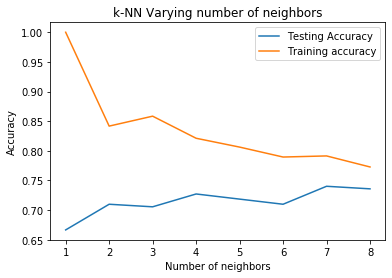

In [7]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=8)

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [10]:
knn.score(X_test,y_test)

0.7359307359307359

### Matriz de confusión y curva ROC

#### Matriz de confusión 

In [11]:
y_pred = knn.predict(X_test)

In [23]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix


array([[131,  19],
       [ 42,  39]])

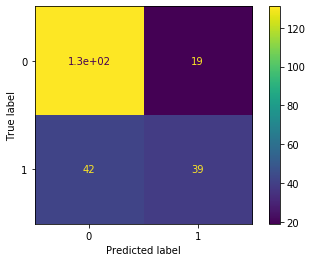

In [13]:
plot_confusion_matrix(knn,X_test,y_test)


Considerando la matriz de confusión, hay:

True negative = 131

False positive = 19

True positive = 39

Fasle negative = 42

#### Curva ROC

In [14]:
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

sensitivity = (TP / float(TP + FN))
specificity = (TN / float(TN + FP))
accuracy = ((TP + TN) / float(TN + TP + FP + FN))

In [15]:
print("="*32)
print("SENSITIVITY = ", sensitivity)
print("="*32)
print("SPECIFICITY = ", specificity)
print("="*32)
print("ACCURACY = " ,accuracy)

SENSITIVITY =  0.48148148148148145
SPECIFICITY =  0.8733333333333333
ACCURACY =  0.7359307359307359


In [16]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

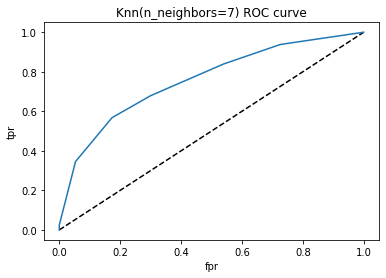

In [17]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [18]:
roc_auc_score(y_test,y_pred_proba)

0.7567078189300411

## Hiperparametrización 

No es difícil notal que el único parámetro de modelo es k y se quiere encontrar el mejor parámetro para k.
A esto se le llama hiperparametrización y existen muchos métodos de hiperparametrización. Para esto usaremos el método de GridSearchCrossValidation

In [19]:
param_grid = {'n_neighbors':np.arange(1,30)}

In [20]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
knn_cv.best_score_

0.7578558696205755

In [22]:
knn_cv.best_params_

{'n_neighbors': 14}


Por lo tanto, un clasificador knn con un número de vecinos como 14 logra la mejor puntuación de 0.7578, es decir, alrededor del 76%